In [2]:
import os
import cv2
from pathlib import Path
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydot
import shutil
import random
import wget

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [256]:
#Reading dataframe
f_df = pd.read_csv("f_df.csv")

In [257]:
#Deleting unwanted columns
f_df = f_df.drop(['Unnamed: 0', 'level_0', 'index'], axis=1)

In [258]:
#Keeping 6 genres
f_df = f_df[f_df.Genre.isin(["Comedy", "Documentary", "Horror", "Western", "Romance", "Animation", "Thriller", "Drama"])]

#f_df = f_df[f_df.Genre.isin(["Horror", "Western","Animation"])]

In [227]:
#Resetting index
f_df = f_df.reset_index(drop=True)

In [228]:
final_cathegories = []
for cat in f_df["Genre"].unique():
    
    #We find the Genres, that is only described by cathegory
    # "|" indicate that the movie has more than one genre.
    if "|" not in str(cat):
        final_cathegories.append(cat)

print(final_cathegories)

['Animation', 'Horror', 'Western']


In [229]:
f_df.head(10)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy_Story_(1995),8.3,Animation,https://images-na.ssl-images-amazon.com/images...
1,112896,http://www.imdb.com/title/tt112896,Dracula:_Dead_and_Loving_It_(1995),5.8,Horror,https://images-na.ssl-images-amazon.com/images...
2,112453,http://www.imdb.com/title/tt112453,Balto_(1995),7.1,Animation,https://images-na.ssl-images-amazon.com/images...
3,114148,http://www.imdb.com/title/tt114148,Pocahontas_(1995),6.7,Animation,https://images-na.ssl-images-amazon.com/images...
4,116367,http://www.imdb.com/title/tt116367,From_Dusk_Till_Dawn_(1996),7.3,Horror,https://images-na.ssl-images-amazon.com/images...
5,114825,http://www.imdb.com/title/tt114825,Vampire_in_Brooklyn_(1995),4.5,Horror,https://images-na.ssl-images-amazon.com/images...
6,112288,http://www.imdb.com/title/tt112288,The_Addiction_(1995),6.4,Horror,https://images-na.ssl-images-amazon.com/images...
7,113690,http://www.imdb.com/title/tt113690,Lord_of_Illusions_(1995),6.0,Horror,https://images-na.ssl-images-amazon.com/images...
8,110604,http://www.imdb.com/title/tt110604,Mute_Witness_(1995),6.8,Horror,https://images-na.ssl-images-amazon.com/images...
9,110620,http://www.imdb.com/title/tt110620,Nadja_(1994),6.0,Horror,https://images-na.ssl-images-amazon.com/images...


In [231]:
try:
    os.mkdir("data/posters")
except FileExistsError:
    print("posters already exists.")

In [232]:
errors = []
for i in range(len(f_df)):
    
    index = str(i)
    #Creating name of poster files
    filename = "data/posters/"+ str(index.zfill(5)) + "_" + str(f_df["Title"][i]) +  ".jpg"
    print(filename)
    
    #Accessing the links for the posters
    image_url = f_df["Poster"][i]
    #print(image_url)
    
    #Error handling.
    #If the poster does not exist: pass, and move on to the next file.
    try:
        image_filename = wget.download(image_url, filename)
    except:
        print("There was an error")
        errors.append(int(index))
        pass

data/posters/00000_Toy_Story_(1995).jpg
data/posters/00001_Dracula:_Dead_and_Loving_It_(1995).jpg
data/posters/00002_Balto_(1995).jpg
data/posters/00003_Pocahontas_(1995).jpg
data/posters/00004_From_Dusk_Till_Dawn_(1996).jpg
data/posters/00005_Vampire_in_Brooklyn_(1995).jpg
data/posters/00006_The_Addiction_(1995).jpg
data/posters/00007_Lord_of_Illusions_(1995).jpg
data/posters/00008_Mute_Witness_(1995).jpg
data/posters/00009_Nadja_(1994).jpg
data/posters/00010_Wild_Bill_(1995).jpg
data/posters/00011_Castle_Freak_(1995).jpg
data/posters/00012_A_Goofy_Movie_(1995).jpg
data/posters/00013_Hideaway_(1995).jpg
data/posters/00014_Gumby:_The_Movie_(1995).jpg
data/posters/00015_Interview_with_the_Vampire:_The_Vampire_Chronicles_(1994).jpg
data/posters/00016_Mary_Shelley's_Frankenstein_(1994).jpg
data/posters/00017_Beyond_Bedlam_(1994).jpg
data/posters/00018_Relative_Fear_(1994).jpg
data/posters/00019_The_Swan_Princess_(1994).jpg
data/posters/00020_Tales_from_the_Crypt:_Demon_Knight_(1995).jpg
d

data/posters/00168_Poltergeist_II:_The_Other_Side_(1986).jpg
data/posters/00169_Poltergeist_III_(1988).jpg
data/posters/00170_Exorcist_II:_The_Heretic_(1977).jpg
data/posters/00171_The_Exorcist_III_(1990).jpg
data/posters/00172_Gremlins_(1984).jpg
data/posters/00173_Gremlins_2:_The_New_Batch_(1990).jpg
data/posters/00174_The_Apple_Dumpling_Gang_Rides_Again_(1979).jpg
data/posters/00175_Bambi_(1942).jpg
data/posters/00176_The_Great_Mouse_Detective_(1986).jpg
data/posters/00177_The_Jungle_Book_(1967).jpg
data/posters/00178_Lady_and_the_Tramp_(1955).jpg
data/posters/00179_101_Dalmatians_(1961).jpg
data/posters/00180_Peter_Pan_(1953).jpg
data/posters/00181_The_Rescuers_Down_Under_(1990).jpg
data/posters/00182_The_Rescuers_(1977).jpg
data/posters/00183_The_Return_of_Jafar_(1994).jpg
data/posters/00184_Sleeping_Beauty_(1959).jpg
data/posters/00185_Steamboat_Willie_(1928).jpg
data/posters/00186_Halloween_H20:_20_Years_Later_(1998).jpg
data/posters/00187_Graveyard_Shift_(1990).jpg
data/posters

data/posters/00341_Final_Destination_(2000).jpg
data/posters/00342_Creature_Comforts_(1989).jpg
data/posters/00343_Hillbillys_in_a_Haunted_House_(1967).jpg
data/posters/00344_The_City_of_the_Dead_(1960).jpg
data/posters/00345_The_Road_to_El_Dorado_(2000).jpg
data/posters/00346_Autopsy_(1975).jpg
data/posters/00347_El_Dorado_(1967).jpg
data/posters/00348_Torso_(1973).jpg
data/posters/00349_True_Grit_(1969).jpg
data/posters/00350_The_Outlaw_Josey_Wales_(1976).jpg
data/posters/00351_The_Bells_(1926).jpg
data/posters/00352_What_Ever_Happened_to_Baby_Jane?_(1962).jpg
data/posters/00353_Empire_of_Passion_(1978).jpg
data/posters/00354_The_Hidden_(1987).jpg
data/posters/00355_Inferno_(1980).jpg
data/posters/00356_Les_maí¬tres_du_temps_(1982).jpg
data/posters/00357_Saludos_Amigos_(1942).jpg
data/posters/00358_Dinosaur_(2000).jpg
data/posters/00359_Possession_(1981).jpg
data/posters/00360_Carnival_of_Souls_(1962).jpg
data/posters/00361_Lisa_and_the_Devil_(1973).jpg
data/posters/00362_In_Old_Cali

data/posters/00515_Thir13en_Ghosts_(2001).jpg
data/posters/00516_Monsters,_Inc._(2001).jpg
data/posters/00517_When_a_Stranger_Calls_(1979).jpg
data/posters/00518_The_Devil's_Backbone_(2001).jpg
data/posters/00519_Circus_of_Horrors_(1960).jpg
data/posters/00520_Don't_Go_in_the_House_(1979).jpg
data/posters/00521_I_Bury_the_Living_(1958).jpg
data/posters/00522_Jimmy_Neutron:_Boy_Genius_(2001).jpg
data/posters/00523_Otesíçnek_(2000).jpg
data/posters/00524_The_Convent_(2000).jpg
data/posters/00525_Fritz_the_Cat_(1972).jpg
data/posters/00526_The_Nine_Lives_of_Fritz_the_Cat_(1974).jpg
data/posters/00527_The_Flight_of_Dragons_(1982).jpg
data/posters/00528_Fire_and_Ice_(1983).jpg
data/posters/00529_4_for_Texas_(1963).jpg
data/posters/00530_One-Eyed_Jacks_(1961).jpg
data/posters/00531_The_Mothman_Prophecies_(2002).jpg
data/posters/00532_Escaflowne:_The_Movie_(2000).jpg
data/posters/00533_Metropolis_(2001).jpg
data/posters/00534_Return_to_Never_Land_(2002).jpg
data/posters/00535_The_Good_Son_(19

data/posters/00689_A_Man_Called_Horse_(1970).jpg
data/posters/00690_Dementia_13_(1963).jpg
data/posters/00691_Rio_Lobo_(1970).jpg
data/posters/00692_Two_Evil_Eyes_(1990).jpg
data/posters/00693_Destry_Rides_Again_(1939).jpg
data/posters/00694_The_Electric_Horseman_(1979).jpg
data/posters/00695_Gay_Purr-ee_(1962).jpg
data/posters/00696_The_Rare_Breed_(1966).jpg
data/posters/00697_Shenandoah_(1965).jpg
data/posters/00698_The_Far_Country_(1954).jpg
data/posters/00699_Winchester_'73_(1950).jpg
data/posters/00700_The_Big_Trail_(1930).jpg
data/posters/00701_The_Comancheros_(1961).jpg
data/posters/00702_Duel_at_Diablo_(1966).jpg
data/posters/00703_North_to_Alaska_(1960).jpg
data/posters/00704_The_Undefeated_(1969).jpg
data/posters/00705_Cahill_U.S._Marshal_(1973).jpg
data/posters/00706_Chisum_(1970).jpg
data/posters/00707_Rugrats_Go_Wild_(2003).jpg
data/posters/00708_The_Satanic_Rites_of_Dracula_(1973).jpg
data/posters/00709_Ed_and_His_Dead_Mother_(1993).jpg
data/posters/00710_Ring_of_Terror_(

data/posters/00865_Evilspeak_(1981).jpg
data/posters/00866_Octane_(2003).jpg
data/posters/00867_Yu-Gi-Oh!:_The_Movie_(2004).jpg
data/posters/00868_Exorcist:_The_Beginning_(2004).jpg
data/posters/00869_Cheerleader_Camp_(1988).jpg
data/posters/00870_Anacondas:_The_Hunt_for_the_Blood_Orchid_(2004).jpg
data/posters/00871_The_Mangler_(1995).jpg
data/posters/00872_Night_of_the_Demons_(1988).jpg
data/posters/00873_Witchboard_(1986).jpg
data/posters/00874_The_Forgotten_(2004).jpg
data/posters/00875_Shaun_of_the_Dead_(2004).jpg
data/posters/00876_The_Sentinel_(1977).jpg
data/posters/00877_The_Legacy_(1978).jpg
data/posters/00878_Basket_Case_3_(1991).jpg
data/posters/00879_Basket_Case_2_(1990).jpg
data/posters/00880_Orca_(1977).jpg
data/posters/00881_The_Terror_(1963).jpg
data/posters/00882_Jack-O_(1995).jpg
data/posters/00883_Cannibal_Holocaust_(1980).jpg
data/posters/00884_Shark_Tale_(2004).jpg
data/posters/00885_Epidemic_(1987).jpg
data/posters/00886_Dance_of_the_Vampires_(1967).jpg
data/post

data/posters/01034_Idle_Mist_(1998).jpg
data/posters/01035_Dagon_(2001).jpg
data/posters/01036_Darkness_(2002).jpg
data/posters/01037_Blood:_The_Last_Vampire_(2000).jpg
data/posters/01038_Renegade_(2004).jpg
data/posters/01039_The_Barber_(2002).jpg
data/posters/01040_My_Little_Eye_(2002).jpg
data/posters/01041_American_Psycho_II:_All_American_Girl_(2002).jpg
data/posters/01042_Double_Vision_(2002).jpg
data/posters/01043_The_Gathering_(2002).jpg
data/posters/01044_Katakuri-ke_no_kíÇfuku_(2001).jpg
data/posters/01045_Dead_End_(2003).jpg
data/posters/01046_Jesus_Christ_Vampire_Hunter_(2001).jpg
data/posters/01047_Jisatsu_sí¢kuru_(2001).jpg
data/posters/01048_Immortel_(ad_vitam)_(2004).jpg
data/posters/01049_A_Sound_of_Thunder_(2005).jpg
data/posters/01050_The_Lion_King_1_1/2_(2004).jpg
There was an error
data/posters/01051_Love_Object_(2003).jpg
data/posters/01052_The_Animatrix_(2003).jpg
data/posters/01053_Ju-on_(2000).jpg
data/posters/01054_Ju-on_2_(2000).jpg
data/posters/01055_Alive_(2

data/posters/01209_7_Faces_of_Dr._Lao_(1964).jpg
data/posters/01210_Hostel_(2005).jpg
data/posters/01211_Hoodwinked!_(2005).jpg
data/posters/01212_Casper_Meets_Wendy_(1998).jpg
data/posters/01213_Buried_Alive_(1990).jpg
data/posters/01214_KíÇrei_(2000).jpg
data/posters/01215_Calvaire_(2004).jpg
data/posters/01216_The_Dunwich_Horror_(1970).jpg
data/posters/01217_Hellraiser:_Hellseeker_(2002).jpg
data/posters/01218_The_Dark_(2005).jpg
data/posters/01219_Broken_Lance_(1954).jpg
data/posters/01220_The_Call_of_Cthulhu_(2005).jpg
data/posters/01221_Troll_(1986).jpg
data/posters/01222_Curious_George_(2006).jpg
data/posters/01223_When_a_Stranger_Calls_(2006).jpg
data/posters/01224_Tamara_(2005).jpg
data/posters/01225_Doogal_(2006).jpg
data/posters/01226_Trauma_(1993).jpg
data/posters/01227_Half_Light_(2006).jpg
data/posters/01228_Ultimate_Avengers_(2006).jpg
data/posters/01229_Ice_Age:_The_Meltdown_(2006).jpg
data/posters/01230_The_Naked_Spur_(1953).jpg
data/posters/01231_Leprechaun_2_(1994).j

data/posters/01389_The_Killing_Floor_(2007).jpg
data/posters/01390_Persepolis_(2007).jpg
data/posters/01391_Frostbitten_(2006).jpg
data/posters/01392_Wood_&_Stock:_Sexo,_OrÌ©gano_e_Rock'n'Roll_(2006).jpg
data/posters/01393_The_Last_Winter_(2006).jpg
data/posters/01394_Can't_Help_Singing_(1944).jpg
data/posters/01395_Saw_IV_(2007).jpg
data/posters/01396_SÌ«seiji_(1999).jpg
data/posters/01397_The_Monster_Walks_(1932).jpg
data/posters/01398_Valhalla_(1986).jpg
data/posters/01399_All_Souls_Day:_Dia_de_los_Muertos_(2005).jpg
data/posters/01400_Bee_Movie_(2007).jpg
data/posters/01401_Azur_et_Asmar_(2006).jpg
data/posters/01402_The_Dawn_Rider_(1935).jpg
data/posters/01403_Beowulf_(2007).jpg
data/posters/01404_5ive_Girls_(2006).jpg
data/posters/01405_Texas_Terror_(1935).jpg
data/posters/01406_Murder_Party_(2007).jpg
data/posters/01407_The_Mist_(2007).jpg
data/posters/01408_Enchanted_(2007).jpg
data/posters/01409_P2_(2007).jpg
data/posters/01410_Alvin_and_the_Chipmunks_(2007).jpg
data/posters/0

data/posters/01570_Mirrors_(2008).jpg
data/posters/01571_Fly_Me_to_the_Moon_3D_(2008).jpg
data/posters/01572_Sukiyaki_Western_Django_(2007).jpg
data/posters/01573_American_Zombie_(2007).jpg
data/posters/01574_Return_to_House_on_Haunted_Hill_(2007).jpg
data/posters/01575_Feed_(2005).jpg
data/posters/01576_The_Woman_in_Black_(1989).jpg
data/posters/01577_Sergeant_Rutledge_(1960).jpg
data/posters/01578_Mother_of_Tears_(2007).jpg
data/posters/01579_Flu_Bird_Horror_(2008).jpg
data/posters/01580_Africa_addio_(1966).jpg
data/posters/01581_Private_Parts_(1972).jpg
data/posters/01582_100_Feet_(2008).jpg
data/posters/01583_Dead_Fury_(2008).jpg
data/posters/01584_Martyrs_(2008).jpg
data/posters/01585_KM_31:_KilÌ_metro_31_(2006).jpg
data/posters/01586_Alone_in_the_Dark_II_(2008).jpg
data/posters/01587_Dead_Leaves_(2004).jpg
data/posters/01588_FLCL.jpg
data/posters/01589_Ace_High_(1968).jpg
data/posters/01590_AdiÌ_s,_Sabata_(1970).jpg
data/posters/01591_The_Flight_Before_Christmas_(2008).jpg
data/p

data/posters/01742_Dark_Ride_(2006).jpg
data/posters/01743_House_(2008).jpg
data/posters/01744_Aliens_in_the_Attic_(2009).jpg
data/posters/01745_Silent_Night,_Deadly_Night_2_(1987).jpg
data/posters/01746_Winds_of_the_Wasteland_(1936).jpg
data/posters/01747_Randy_Rides_Alone_(1934).jpg
data/posters/01748_West_of_the_Divide_(1934).jpg
data/posters/01749_The_Star_Packer_(1934).jpg
data/posters/01750_Evangerion_shin_gekijÌ«ban:_Jo_(2007).jpg
data/posters/01751_Love_Hina_Christmas_Special:_Silent_Eve_(2000).jpg
data/posters/01752_Feast_II:_Sloppy_Seconds_(2008).jpg
data/posters/01753_The_Haunting_of_Molly_Hartley_(2008).jpg
data/posters/01754_G-Force_(2009).jpg
data/posters/01755_Vengeance_Valley_(1951).jpg
data/posters/01756_Summer_School_(2006).jpg
data/posters/01757_Botched_(2007).jpg
data/posters/01758_Vacancy_2:_The_First_Cut_(2008).jpg
data/posters/01759_Troll_2_(1990).jpg
data/posters/01760_Halloween_II_(2009).jpg
data/posters/01761_9_(2009).jpg
data/posters/01762_Carry_on_Screaming!

data/posters/01910_Sukai_kurora_(2008).jpg
data/posters/01911_Dead_of_Night_(1974).jpg
data/posters/01912_Living_Death_(2006).jpg
data/posters/01913_Bitten_(2008).jpg
data/posters/01914_Seven_Dollars_on_the_Red_(1966).jpg
data/posters/01915_Aces_and_Eights_(1936).jpg
data/posters/01916_A_Nightmare_on_Elm_Street_(2010).jpg
data/posters/01917_Tales_of_Terror_from_Tokyo_and_All_Over_Japan:_The_Movie_(2004).jpg
data/posters/01918_In_a_Dark_Place_(2006).jpg
data/posters/01919_Rancho_Notorious_(1952).jpg
data/posters/01920_Halo_Legends_(2010).jpg
data/posters/01921_Dread_(2009).jpg
data/posters/01922_The_Velvet_Vampire_(1971).jpg
data/posters/01923_Puppet_Master_vs_Demonic_Toys_(2004).jpg
data/posters/01924_Antropophagus_(1980).jpg
data/posters/01925_Pintu_Terlarang_(2009).jpg
data/posters/01926_The_Reeds_(2010).jpg
data/posters/01927_The_Tomb_(2009).jpg
data/posters/01928_At_Midnight_I'll_Take_Your_Soul_(1964).jpg
data/posters/01929_Snarveien_(2009).jpg
data/posters/01930_The_Drawn_Together

data/posters/02085_Amer_(2009).jpg
data/posters/02086_Saint_Ange_(2004).jpg
data/posters/02087_Genå_å__(2000).jpg
data/posters/02088_Day_&_Night_(2010).jpg
data/posters/02089_Wicked_Little_Things_(2006).jpg
data/posters/02090_2012:_Time_for_Change_(2010).jpg
data/posters/02091_Decision_at_Sundown_(1957).jpg
data/posters/02092_La_corta_notte_delle_bambole_di_vetro_(1971).jpg
data/posters/02093_Waxworks_(1924).jpg
data/posters/02094_Samurai_Reincarnation_(1981).jpg
data/posters/02095_Evangerion_shin_gekijÌ«ban:_Ha_(2009).jpg
data/posters/02096_I_Spit_on_Your_Grave_(2010).jpg
data/posters/02097_Corto_Maltese_-_La_ballade_de_la_mer_salÌ©e_(2002).jpg
data/posters/02098_The_Traveler_(2010).jpg
data/posters/02099_Chain_Letter_(2009).jpg
data/posters/02100_Look_What's_Happened_to_Rosemary's_Baby_(1976).jpg
data/posters/02101_Of_Human_Hearts_(1938).jpg
data/posters/02102_The_Rite_(2011).jpg
data/posters/02103_All-Star_Superman_(2011).jpg
data/posters/02104_Offspring_(2009).jpg
data/posters/0210

data/posters/02259_11-11-11_(2011).jpg
data/posters/02260_Daffy_Duck's_Movie:_Fantastic_Island_(1983).jpg
data/posters/02261_Westward_Ho_(1935).jpg
data/posters/02262_Wichita_(1955).jpg
data/posters/02263_From_Beyond_the_Grave_(1974).jpg
data/posters/02264_The_Uninvited_(1996).jpg
data/posters/02265_Moonlight_and_Cactus_(1944).jpg
data/posters/02266_Millhaven_(2010).jpg
data/posters/02267_Lifted_(2006).jpg
data/posters/02268_Gantz:_Perfect_Answer_(2011).jpg
data/posters/02269_AstÌ©rix_et_les_Vikings_(2006).jpg
data/posters/02270_Happy_Feet_Two_(2011).jpg
data/posters/02271_Arthur_Christmas_(2011).jpg
data/posters/02272_12_Days_of_Terror_(2004).jpg
data/posters/02273_Run_for_Cover_(1955).jpg
data/posters/02274_The_Snowman_(1982).jpg
data/posters/02275_The_Demon_Barber_of_Fleet_Street_(1936).jpg
data/posters/02276_Der_Todesking_(1990).jpg
data/posters/02277_Stagecoach_(1966).jpg
data/posters/02278_G.I._Joe:_A_Real_American_Hero.jpg
data/posters/02279_G.I._Joe:_The_Revenge_of_Cobra.jpg
da

data/posters/02426_War_of_the_Dead_(2011).jpg
data/posters/02427_Primal_(2010).jpg
data/posters/02428_Tha_se_do_stin_Kolasi,_agapi_mou_(1999).jpg
data/posters/02429_Chillerama_(2011).jpg
data/posters/02430_ParaNorman_(2012).jpg
data/posters/02431_The_Rites_of_May_(1976).jpg
data/posters/02432_Bells_of_Innocence_(2003).jpg
data/posters/02433_Cinderella_II:_Dreams_Come_True_(2002).jpg
data/posters/02434_Black_Roses_(1988).jpg
data/posters/02435_Evil_Toons_(1992).jpg
data/posters/02436_Piranha_3DD_(2012).jpg
data/posters/02437_ATM_(2012).jpg
data/posters/02438_The_Possession_(2012).jpg
data/posters/02439_The_Apparition_(2012).jpg
data/posters/02440_The_Backwoods_(2006).jpg
data/posters/02441_The_Great_Northfield_Minnesota_Raid_(1972).jpg
data/posters/02442_Runaway_Brain_(1995).jpg
data/posters/02443_Arthur_et_la_vengeance_de_Maltazard_(2009).jpg
data/posters/02444_Apartment_143_(2011).jpg
data/posters/02445_Cuadecuc,_vampir_(1971).jpg
data/posters/02446_Stag_Night_(2008).jpg
data/posters/

data/posters/02592_And_Now_the_Screaming_Starts!_(1973).jpg
data/posters/02593_Westward_the_Women_(1951).jpg
data/posters/02594_In_Their_Skin_(2012).jpg
data/posters/02595_The_Snow_Creature_(1954).jpg
data/posters/02596_Snowbeast_(1977).jpg
data/posters/02597_Riders_of_the_Purple_Sage_(1996).jpg
data/posters/02598_Mezzo_Forte.jpg
data/posters/02599_Trailer_Park_of_Terror_(2008).jpg
data/posters/02600_The_Task_(2011).jpg
data/posters/02601_Curse_of_the_Blair_Witch_(1999).jpg
data/posters/02602_A_Man_Called_Gannon_(1968).jpg
data/posters/02603_'Twas_the_Night_Before_Christmas_(1974).jpg
data/posters/02604_The_Blind_Dead_3_(1974).jpg
data/posters/02605_009_Re:_Cyborg_(2012).jpg
data/posters/02606_Evil_Dead_(2013).jpg
data/posters/02607_Die_Wahrheit_der_LÌ_ge_(2011).jpg
data/posters/02608_A_Lawless_Street_(1955).jpg
data/posters/02609_Across_the_Wide_Missouri_(1951).jpg
data/posters/02610_Never_Sleep_Again:_The_Elm_Street_Legacy_(2010).jpg
data/posters/02611_The_Invincible_Iron_Man_(2007).

data/posters/02764_A_Cadaver_Christmas_(2011).jpg
data/posters/02765_The_Mooring_(2012).jpg
data/posters/02766_Seyyit_Han:_Topragin_Gelini_(1968).jpg
data/posters/02767_Jesse_James_Meets_Frankenstein's_Daughter_(1966).jpg
data/posters/02768_Resurrecting_the_Street_Walker_(2009).jpg
data/posters/02769_Cloudy_with_a_Chance_of_Meatballs_2_(2013).jpg
data/posters/02770_Blood_Shack_(1971).jpg
data/posters/02771_The_Devil's_Ground_(2009).jpg
data/posters/02772_An_All_Dogs_Christmas_Carol_(1998).jpg
data/posters/02773_Zombie_High_(1987).jpg
data/posters/02774_Voodoo_Dawn_(1991).jpg
data/posters/02775_Stitches_(2012).jpg
data/posters/02776_Unrest_(2006).jpg
data/posters/02777_Carrie_(2013).jpg
data/posters/02778_The_Congress_(2013).jpg
data/posters/02779_Back_in_the_Saddle_(1941).jpg
data/posters/02780_Escape_from_Tomorrow_(2013).jpg
data/posters/02781_Undocumented_(2010).jpg
data/posters/02782_Cult_of_the_Cobra_(1955).jpg
data/posters/02783_Bloodsucking_Pharaohs_in_Pittsburgh_(1991).jpg
data/

data/posters/02935_Apartment_1303_3D_(2012).jpg
data/posters/02936_Bionicle:_Mask_of_Light_(2003).jpg
data/posters/02937_Bionicle_2:_Legends_of_Metru_Nui_(2004).jpg
data/posters/02938_Bionicle_3:_Web_of_Shadows_(2005).jpg
data/posters/02939_Arrugas_(2011).jpg
data/posters/02940_In_Fear_(2013).jpg
data/posters/02941_Koto_no_ha_no_niwa_(2013).jpg
data/posters/02942_Bionicle:_The_Legend_Reborn_(2009).jpg
data/posters/02943_Bitter_Feast_(2010).jpg
data/posters/02944_The_Traveling_Executioner_(1970).jpg
data/posters/02945_First_Squad:_The_Moment_of_Truth_(2009).jpg
data/posters/02946_Contracted_(2013).jpg
data/posters/02947_Dorian_Gray_(1970).jpg
data/posters/02948_Legend_of_the_Boneknapper_Dragon_(2010).jpg
data/posters/02949_A_Bullet_for_the_General_(1967).jpg
data/posters/02950_Dead_Genesis_(2010).jpg
data/posters/02951_Dick_Figures:_The_Movie_(2013).jpg
data/posters/02952_Diamante_Lobo_(1976).jpg
data/posters/02953_Blackenstein_(1973).jpg
data/posters/02954_Blessed_(2004).jpg
data/poste

data/posters/03105_Blazing_Guns_(1943).jpg
data/posters/03106_Care_Bears_to_the_Rescue_(2010).jpg
data/posters/03107_TaiyÌ«_no_Ì«ji_Horusu_no_daibÌ«ken_(1968).jpg
data/posters/03108_Aftermath_(2015).jpg
data/posters/03109_Honeymoon_(2014).jpg
data/posters/03110_Pharaoh's_Curse_(1957).jpg
data/posters/03111_Cheech_&_Chong's_Animated_Movie_(2013).jpg
data/posters/03112_Saint_Seiya:_Legend_of_Sanctuary_(2014).jpg
data/posters/03113_Where_the_Dead_Go_to_Die_(2012).jpg
data/posters/03114_Bambi_Meets_Godzilla_(1974).jpg
data/posters/03115_A_Return_to_Salem's_Lot_(1987).jpg
data/posters/03116_Advance_to_the_Rear_(1964).jpg
data/posters/03117_Carson_City_(1952).jpg
data/posters/03118_Catacombs_(1988).jpg
data/posters/03119_Aladdin_(1992).jpg
data/posters/03120_Thomasine_&_Bushrod_(1974).jpg
data/posters/03121_The_Other_One_(2014).jpg
data/posters/03122_Dead_Within_(2014).jpg
data/posters/03123_The_Homesman_(2014).jpg
data/posters/03124_Les_dents_du_singe_(1961).jpg
data/posters/03125_Les_temps

data/posters/03269_Witchcraft_(1964).jpg
data/posters/03270_Jackboots_on_Whitehall_(2010).jpg
data/posters/03271_Samson_og_Sally_(1984).jpg
data/posters/03272_The_Little_Fox_(1981).jpg
data/posters/03273_Kappa_no_ku_to_natsu_yasumi_(2007).jpg
data/posters/03274_Head_Over_Heels_(2012).jpg
data/posters/03275_Sakasama_no_Patema_(2013).jpg
data/posters/03276_The_Oblong_Box_(1969).jpg
data/posters/03277_Cheon-nyeon-yeo-woo-yeo-woo-bi_(2007).jpg
data/posters/03278_Arcana_(1972).jpg
data/posters/03279_Werner_-_Beinhart!_(1990).jpg
data/posters/03280_Jetsons:_The_Movie_(1990).jpg
data/posters/03281_Paths_of_Hate_(2010).jpg
data/posters/03282_Bloody_Birthday_(1981).jpg
data/posters/03283_The_Legend_of_Sarila_(2013).jpg
data/posters/03284_Imago_mortis_(2009).jpg
data/posters/03285_The_Gun_That_Won_the_West_(1955).jpg
data/posters/03286_Gunfighters_(1947).jpg
data/posters/03287_The_Wicker_Tree_(2011).jpg
data/posters/03288_Gallows_Hill_(2013).jpg
data/posters/03289_Too_Many_Cooks_(2014).jpg
data/

data/posters/03440_Howling_VI:_The_Freaks_(1991).jpg
data/posters/03441_Killer_Pad_(2008).jpg
data/posters/03442_Rachel_and_the_Stranger_(1948).jpg
data/posters/03443_The_Indian_Fighter_(1955).jpg
data/posters/03444_Warlock_III:_The_End_of_Innocence_(1999).jpg
data/posters/03445_The_Lost_Tribe_(2009).jpg
data/posters/03446_The_Telegraph_Trail_(1933).jpg
data/posters/03447_The_Moonlighter_(1953).jpg
data/posters/03448_Heaven_with_a_Gun_(1969).jpg
data/posters/03449_The_Man_Who_Came_Back_(2008).jpg
data/posters/03450_Night_of_Dark_Shadows_(1971).jpg
data/posters/03451_The_Thirst_(2006).jpg
data/posters/03452_Mostly_Ghostly_(2008).jpg
data/posters/03453_The_Old_Dark_House_(1963).jpg
data/posters/03454_Necrosis_(2009).jpg
data/posters/03455_Jack_Frost_(1979).jpg
data/posters/03456_Monster_(2008).jpg
data/posters/03457_The_Curse_of_the_Mummy's_Tomb_(1964).jpg
data/posters/03458_The_Duchess_and_the_Dirtwater_Fox_(1976).jpg
data/posters/03459_Intermedio_(2005).jpg
data/posters/03460_Space_Chi

data/posters/03606_Barbie:_A_Fashion_Fairytale_(2010).jpg
data/posters/03607_Kafuka:_Inaka_isha_(2007).jpg
data/posters/03608_Pluto's_Christmas_Tree_(1952).jpg
data/posters/03609_Stille_Nacht:_Dramolet_(1988).jpg
data/posters/03610_Coven_(2000).jpg
data/posters/03611_Rehearsals_for_Extinct_Anatomies_(1988).jpg
data/posters/03612_Suur_TÌµll_(1980).jpg
data/posters/03613_Bob's_Birthday_(1994).jpg
data/posters/03614_Broom-Stick_Bunny_(1956).jpg
data/posters/03615_The_Little_Matchgirl_(2006).jpg
data/posters/03616_The_Haunted_House_(1929).jpg
data/posters/03617_The_Horribly_Slow_Murderer_with_the_Extremely_Inefficient_Weapon_(2008).jpg
data/posters/03618_A_Flintstones_Christmas_Carol_(1994).jpg
data/posters/03619_Yozhik_v_tumane_(1975).jpg
data/posters/03620_The_Cat's_Out_(1931).jpg
data/posters/03621_The_Black_Cat_(1941).jpg
data/posters/03622_Rivelazioni_di_un_maniaco_sessuale_al_capo_della_squadra_mobile_(1972).jpg
data/posters/03623_FÌ_hrmann_Maria_(1936).jpg
data/posters/03624_Black_B

data/posters/03769_New_Year's_Evil_(1980).jpg
data/posters/03770_Robotech:_The_Movie_(1986).jpg
data/posters/03771_Midnight_Ride_(1990).jpg
data/posters/03772_Julie_Darling_(1983).jpg
data/posters/03773_Savage_Weekend_(1979).jpg
data/posters/03774_The_Comeback_(1978).jpg
data/posters/03775_Cover_Up_(1974).jpg
data/posters/03776_House_of_Whipcord_(1974).jpg
data/posters/03777_The_Flesh_and_Blood_Show_(1972).jpg
data/posters/03778_Killer_Crocodile_(1989).jpg
data/posters/03779_Santo_vs._las_lobas_(1976).jpg
data/posters/03780_Hellgate_(2011).jpg
data/posters/03781_The_Brass_Legend_(1956).jpg
data/posters/03782_Dinotopia:_Quest_for_the_Ruby_Sunstone_(2005).jpg
data/posters/03783_Santa's_Apprentice_(2010).jpg
data/posters/03784_Ronal_Barbaren_(2011).jpg
data/posters/03785_Benjamin_BlÌ_mchen_-_Seine_schÌ¦nsten_Abenteuer_(1997).jpg
data/posters/03786_Cinderella_III:_A_Twist_in_Time_(2007).jpg
data/posters/03787_Hui_Buh_(2006).jpg
data/posters/03788_Der_kleine_EisbÌ_r_-_Neue_Abenteuer,_neue_F

data/posters/03929_Crazy_Westerners_(1968).jpg
data/posters/03930_Django,_Prepare_a_Coffin_(1968).jpg
data/posters/03931_Forgotten_Pistolero_(1969).jpg
data/posters/03932_Adventure_Planet_(2012).jpg
data/posters/03933_The_Man_Called_Noon_(1973).jpg
data/posters/03934_The_Iron_Sheriff_(1957).jpg
data/posters/03935_The_Backwater_Gospel_(2011).jpg
data/posters/03936_The_Dorm_(2014).jpg
data/posters/03937_Sleepaway_Camp_III:_Teenage_Wasteland_(1989).jpg
data/posters/03938_The_Ransom_of_Red_Chief_(1998).jpg
data/posters/03939_Reminiscence:_The_Beginning_(2014).jpg
data/posters/03940_Maggie_(2015).jpg
data/posters/03941_Ilsa_the_Tigress_of_Siberia_(1977).jpg
data/posters/03942_Slow_West_(2015).jpg
data/posters/03943_The_Mad_(2007).jpg
data/posters/03944_The_Midnight_Hour_(1985).jpg
data/posters/03945_The_Human_Centipede_III_(Final_Sequence)_(2015).jpg
data/posters/03946_The_Green_Inferno_(2013).jpg
data/posters/03947_Brave_Story_(2006).jpg
data/posters/03948_The_Survivor_(1981).jpg
data/post

data/posters/04096_Gingerdead_Man_Vs._Evil_Bong_(2013).jpg
data/posters/04097_Kung_Fu_Panda:_Secrets_of_the_Masters_(2011).jpg
data/posters/04098_The_Prodigies_(2011).jpg
data/posters/04099_Santa_Claus_Is_Comin'_to_Town_(1970).jpg
data/posters/04100_Mickey's_Trailer_(1938).jpg
data/posters/04101_Creep_(2014).jpg
data/posters/04102_Le_chant_du_StyrÌ¬ne_(1959).jpg
data/posters/04103_PokÌ©mon_the_Movie:_Genesect_and_the_Legend_Awakened_(2013).jpg
data/posters/04104_PokÌ©mon:_Arceus_and_the_Jewel_of_Life_(2009).jpg
data/posters/04105_PokÌ©mon:_The_Rise_of_Darkrai_(2007).jpg
data/posters/04106_PokÌ©mon:_Lucario_and_the_Mystery_of_Mew_(2005).jpg
data/posters/04107_See_No_Evil_2_(2014).jpg
data/posters/04108_Clerks:_The_Lost_Scene_(2004).jpg
data/posters/04109_The_Pact_II_(2014).jpg
data/posters/04110_The_Ouija_Experiment_2:_Theatre_of_Death_(2015).jpg
data/posters/04111_Back_to_the_Jurassic_(2015).jpg
data/posters/04112_Maya_the_Bee_Movie_(2014).jpg
data/posters/04113_Private_Number_(2014).j

data/posters/04260_Fracchia_Vs._Dracula_(1985).jpg
data/posters/04261_i-Lived_(2015).jpg
data/posters/04262_Always_Watching:_A_Marble_Hornets_Story_(2015).jpg
data/posters/04263_The_Vatican_Tapes_(2015).jpg
data/posters/04264_Yakuza_Apocalypse_(2015).jpg
data/posters/04265_Batman_Unlimited:_Monster_Mayhem_(2015).jpg
data/posters/04266_Hollywood_Chainsaw_Hookers_(1988).jpg
data/posters/04267_The_Invoking_(2013).jpg
data/posters/04268_Kingdom_Come_(2014).jpg
data/posters/04269_Monster_High-Scaris:_City_of_Frights_(2013).jpg
data/posters/04270_Exeter_(2015).jpg
data/posters/04271_Tarzan_II_(2005).jpg
data/posters/04272_PokÌ©mon:_Giratina_and_the_Sky_Warrior_(2008).jpg
data/posters/04273_The_Redeemer:_Son_of_Satan!_(1978).jpg
data/posters/04274_HerutÌ¢_sukerutÌ¢_(2012).jpg
data/posters/04275_The_VVitch:_A_New-England_Folktale_(2015).jpg
data/posters/04276_Les_contes_de_la_nuit_(2011).jpg
data/posters/04277_La_meute_(2010).jpg
data/posters/04278_KidÌ«_senshi_Gandamu_II:_Ai_senshihen_(1981).

data/posters/04422_Zhuo_yao_ji_(2015).jpg
data/posters/04423_Intruders_(2015).jpg
data/posters/04424_Gekijouban_Hunter_x_Hunter:_Fantomu_rÌÈju_(2013).jpg
data/posters/04425_Gekijouban_Hunter_x_Hunter:_The_Last_Mission_(2013).jpg
data/posters/04426_Call_Girl_of_Cthulhu_(2014).jpg
data/posters/04427_Visions_(2015).jpg
data/posters/04428_Miss_Hokusai_(2015).jpg
data/posters/04429_The_Timber_(2015).jpg
data/posters/04430_The_Willies_(1990).jpg
data/posters/04431_Evil_Things_(2009).jpg
data/posters/04432_Last_Shift_(2014).jpg
data/posters/04433_Pay_the_Ghost_(2015).jpg
data/posters/04434_Davy_Crockett,_Indian_Scout_(1950).jpg
data/posters/04435_Macropolis_(2012).jpg
data/posters/04436_Oh_Willy..._(2012).jpg
data/posters/04437_Acolytes_(2008).jpg
data/posters/04438_Babes_in_Toyland_(1997).jpg
data/posters/04439_Ghoul_(2015).jpg
data/posters/04440_Ghoul_(2012).jpg
data/posters/04441_Resurrection_County_(2008).jpg
data/posters/04442_Remains_(2011).jpg
data/posters/04443_Devil_Seed_(2012).jpg
d

data/posters/04596_Mommy_(1995).jpg
data/posters/04597_Monster_Dog_(1984).jpg
data/posters/04598_Needle_(2010).jpg
data/posters/04599_Octopus_(2000).jpg
data/posters/04600_Why_Horror?_(2014).jpg
data/posters/04601_Tormented_(2014).jpg
data/posters/04602_The_Triangle_(2001).jpg
data/posters/04603_Lust_of_the_Vampire_(1957).jpg
data/posters/04604_The_House_of_Exorcism_(1975).jpg
data/posters/04605_Gunman_Called_Nebraska_(1966).jpg
data/posters/04606_Two_Sons_of_Ringo_(1966).jpg
data/posters/04607_The_Moment_to_Kill_(1968).jpg
data/posters/04608_Guns_for_Dollars_(1971).jpg
data/posters/04609_A_Bullet_for_a_Stranger_(1971).jpg
data/posters/04610_Return_of_Halleluja_(1972).jpg
data/posters/04611_Holy_God,_Here_Comes_the_Passatore!_(1973).jpg
data/posters/04612_In_the_West_There_Was_a_Man_Named_Invincible_(1973).jpg
data/posters/04613_Di_Tresette_ce_n'Ì¬_uno,_tutti_gli_altri_son_nessuno_(1974).jpg
data/posters/04614_All_Hallows'_Eve_(2013).jpg
data/posters/04615_Haze_(2005).jpg
data/posters/

data/posters/04764_Murder_in_the_Dark_(2013).jpg
data/posters/04765_Raw_Force_(1982).jpg
data/posters/04766_Kiseijuu_(2014).jpg
data/posters/04767_Kiseijuu:_Kanketsuhen_(2015).jpg
data/posters/04768_A_Cosmic_Christmas_(1977).jpg
data/posters/04769_Unnatural_(2015).jpg
data/posters/04770_Lumberjack_Man_(2015).jpg
data/posters/04771_Night_of_the_Living_Deb_(2015).jpg
data/posters/04772_Kung_Fu_Panda_3_(2016).jpg
data/posters/04773_Mobile_Suit_Gundam_F91_(1991).jpg
data/posters/04774_KidÌ«_senshi_Gandamu:_GyakushÌÈ_no_ShÌ¢_(1988).jpg
data/posters/04775_Ginga_eiyÌÈ_densetsu:_Waga_seifuku_wa_hoshi_no_taikai_(1988).jpg
data/posters/04776_O-ssak-han_yeon-ae_(2011).jpg
data/posters/04777_Nestor,_the_Long-Eared_Christmas_Donkey_(1977).jpg
data/posters/04778_Rudolph_and_Frosty's_Christmas_in_July_(1979).jpg
data/posters/04779_Feng_shui_(2004).jpg
data/posters/04780_Boruto:_Naruto_the_Movie_(2015).jpg
data/posters/04781_Headless_(2015).jpg
data/posters/04782_Comforting_Skin_(2011).jpg
data/poster

data/posters/04934_Blood_Tea_and_Red_String_(2006).jpg
data/posters/04935_FimfÌÁrum_Jana_Wericha_(2002).jpg
data/posters/04936_FimfÌÁrum_2_(2006).jpg
data/posters/04937_Into_the_Badlands_(1991).jpg
data/posters/04938_Sundown:_The_Vampire_in_Retreat_(1989).jpg
data/posters/04939_Apocalyptic_(2014).jpg
data/posters/04940_Classroom_6_(2015).jpg
data/posters/04941_616:_Paranormal_Incident_(2013).jpg
data/posters/04942_Eoh-neu-nal-gap-ja-gi_D-Day_(2006).jpg
data/posters/04943_Severed_Footage_(2012).jpg
data/posters/04944_Gore,_Quebec_(2014).jpg
data/posters/04945_Long_Pigs_(2007).jpg
data/posters/04946_Death_Spa_(1989).jpg
data/posters/04947_Johnny_Corncob_(1973).jpg
data/posters/04948_The_Cat_Who_Walked_by_Herself_(1988).jpg
data/posters/04949_Die_letzte_Rache_(1982).jpg
data/posters/04950_The_Life_&_Adventures_of_Santa_Claus_(2000).jpg
data/posters/04951_The_Story_of_the_Fox_(1930).jpg
data/posters/04952_Skazka_o_tsare_Saltane_(1984).jpg
data/posters/04953_The_Snow_Queen_(1957).jpg
data/p

data/posters/05109_First_Flight_(2006).jpg
data/posters/05110_Up_from_the_Depths_(1979).jpg
data/posters/05111_BreadCrumbs_(2011).jpg
data/posters/05112_Gekijouban_Kidou_senshi_Gandamu_00:_A_wakening_of_the_trailblazer_(2010).jpg
data/posters/05113_Gekijouban_Makurosu_F:_Sayonara_no_tsubasa_(2011).jpg
data/posters/05114_Slugs_(1988).jpg
data/posters/05115_Playback_(2012).jpg
data/posters/05116_Disney_Sing-Along-Songs:_Very_Merry_Christmas_Songs_(1988).jpg
data/posters/05117_Scream,_Pretty_Peggy_(1973).jpg
data/posters/05118_KISS_Meets_the_Phantom_of_the_Park_(1978).jpg
data/posters/05119_Kureyon_Shin-chan_ankoku_tamatama_daitsuiseki_(1997).jpg
data/posters/05120_The_Evil_(1978).jpg
data/posters/05121_Finding_Dory_(2016).jpg
data/posters/05122_My_Super_Psycho_Sweet_16_(2009).jpg
data/posters/05123_My_Super_Psycho_Sweet_16:_Part_2_(2010).jpg
data/posters/05124_My_Super_Psycho_Sweet_16:_Part_3_(2012).jpg
data/posters/05125_Smothered_(2016).jpg
data/posters/05126_Angry_Birds_(2016).jpg
dat

data/posters/05275_Funeral_Home_(1980).jpg
data/posters/05276_The_Animals_(1970).jpg
data/posters/05277_The_Plainsman_(1966).jpg
data/posters/05278_Dead_7_(2016).jpg
data/posters/05279_Curious_George:_A_Very_Monkey_Christmas_(2009).jpg
data/posters/05280_Computer_Killers_(1973).jpg
data/posters/05281_Ice_Age:_Collision_Course_(2016).jpg
data/posters/05282_Lights_Out_(2016).jpg
data/posters/05283_The_Duel_(2016).jpg
data/posters/05284_Boot_Hill_(1969).jpg
data/posters/05285_Black_Mountain_Side_(2014).jpg
data/posters/05286_Sonyeo_(2013).jpg
data/posters/05287_Carnage_Park_(2016).jpg
data/posters/05288_Der_Nachtmahr_(2015).jpg
data/posters/05289_Maen-hol_(2014).jpg
data/posters/05290_Cowboy_Canteen_(1944).jpg
data/posters/05291_Cowboy_Cavalier_(1948).jpg
data/posters/05292_Destry_(1954).jpg
data/posters/05293_Fair_Game_(1986).jpg
data/posters/05294_Traded_(2016).jpg
data/posters/05295_Home_in_Oklahoma_(1946).jpg
data/posters/05296_Springtime_in_the_Sierras_(1947).jpg
data/posters/05297_S

data/posters/05437_Archivo_253_(2015).jpg
data/posters/05438_Mostly_Ghostly_3:_One_Night_in_Doom_House_(2016).jpg
data/posters/05439_Dwae-ji-ui_wang_(2011).jpg
data/posters/05440_SiccÌ¨n_(2014).jpg
data/posters/05441_Siccin_3:_CÌ_rmÌ__Ask_(2016).jpg
data/posters/05442_John_Henry_(2000).jpg
data/posters/05443_Lorenzo_(2004).jpg
data/posters/05444_How_to_Hook_Up_Your_Home_Theater_(2007).jpg
data/posters/05445_Tick_Tock_Tale_(2010).jpg
data/posters/05446_Over_the_Garden_Wall.jpg
data/posters/05447_The_Speak_(2011).jpg
data/posters/05448_Wolf_Creek.jpg
data/posters/05449_Krylya,_nogi_i_khvosty_(1988).jpg
data/posters/05450_Blair_Witch_(2016).jpg
data/posters/05451_31_(2016).jpg
data/posters/05452_Scamper_the_Penguin_(1986).jpg
data/posters/05453_Swamp_Devil_(2008).jpg
data/posters/05454_The_Fall_of_the_House_of_Usher_(1928).jpg
data/posters/05455_Daisy-Head_Mayzie_(1995).jpg
data/posters/05456_Horton_Hatches_the_Egg_(1942).jpg
data/posters/05457_Cat_Girl_(1957).jpg
data/posters/05458_Most_

In [233]:
#Removing errors from list errors.
f_df_error_drop = f_df.drop(labels=errors, axis=0)

In [27]:
# f_df_error_drop.to_csv("data/f_df_error_drop.csv")

In [234]:
from pathlib import Path
#Define the image path
image_path = os.path.join("data/posters")

#Create empty list, where the arrays will be storred
np_images = pd.DataFrame(columns=["Title", "np_array"])

#Convert every image in the image_path to numpy arrays
for image in Path(image_path).glob("*jpg"):
    image_array = cv2.imread(str(image)) 

    
    np_images = np_images.append({'Title' : str(image)[19:len(str(image))-4],
                           'np_array' : image_array}, 
                           ignore_index=True)

In [235]:
# New df np_images and f_df_error_drop must have same lenth
print(len(f_df_error_drop))
print(len(np_images))

test = f_df_error_drop.drop_duplicates(subset=["Title"])
len(test)

5491
5491


5415

In [236]:
#Sorting the images the dataframe with np_arrys by name. Because all names have a 5 digit number similar to the index of - 
#f_df_error_drop dataframe

#Sorting np-dataframe alphabetical
sorted_np_images = np_images.sort_values(by=['Title']).reset_index(drop=True)

In [237]:
#Sorting "original" df alphabetical
f_df_alpha = f_df_error_drop.sort_values(by=['Title']).reset_index(drop=True)

In [238]:
#Inspecting new df
len(f_df_alpha)

5491

In [223]:
#Inspecting new df
#sorted_np_images.head(60)

In [75]:
sorted_np_images.to_csv("data/sorted_np_images.csv")

In [239]:
type(sorted_np_images["np_array"][10])

numpy.ndarray

__f_df_error_drop:__ Dataframe with errors droped but made from the original

__sorted_np_images:__ Dataframe with names of poster with digits infront and the numpy array along with it.

In [4]:
'''When downloading the csv's the np-arrays are converted into strings, so it does not work to load the csv.'''
# f_df_error_drop = pd.read_csv("data/f_df_error_drop.csv")
# sorted_np_images = pd.read_csv("data/sorted_np_images.csv")

In [240]:
#Merging the 2 dataframes by title
merged_df = pd.merge(f_df_alpha, sorted_np_images, on="Title")

In [241]:
#Dropping duplicates in the merged dataset.
merged_df = merged_df.drop_duplicates(subset=['Title']).reset_index(drop=True)

In [242]:
#Taking the arrays from the datafram and putting them into a list again.
#The model does not work, when np_arrays come from a dataframe
np_list = merged_df["np_array"].to_list()

In [243]:
import sys
sys.path.append(os.path.join(".."))
from utils.imutils import jimshow

In [244]:
type(np_list[700])

numpy.ndarray

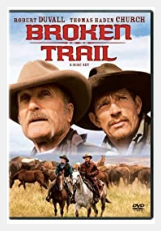

In [245]:
jimshow(np_list[700])

In [189]:
merged_df.tail(20)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster,np_array
10503,1038988,http://www.imdb.com/title/tt1038988,[Rec]_(2007),7.5,Horror,https://images-na.ssl-images-amazon.com/images...,"[[[175, 239, 233], [152, 223, 220], [143, 226,..."
10504,1245112,http://www.imdb.com/title/tt1245112,[Rec]_2_(2009),6.6,Horror,https://images-na.ssl-images-amazon.com/images...,"[[[11, 8, 4], [11, 8, 4], [11, 8, 4], [11, 8, ..."
10505,1754944,http://www.imdb.com/title/tt1754944,eCupid_(2011),5.2,Romance,https://images-na.ssl-images-amazon.com/images...,"[[[168, 116, 40], [168, 116, 40], [168, 116, 4..."
10506,2949196,http://www.imdb.com/title/tt2949196,i-Lived_(2015),4.5,Horror,https://images-na.ssl-images-amazon.com/images...,"[[[59, 25, 9], [59, 25, 9], [59, 25, 9], [59, ..."
10507,1007032,http://www.imdb.com/title/tt1007032,iMurders_(2008),3.9,Horror,https://images-na.ssl-images-amazon.com/images...,"[[[253, 255, 246], [253, 255, 247], [253, 254,..."
10508,2041331,http://www.imdb.com/title/tt2041331,sxtape_(2013),3.3,Horror,https://images-na.ssl-images-amazon.com/images...,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."
10509,92086,http://www.imdb.com/title/tt92086,çThree_Amigos!_(1986),6.4,Western,https://images-na.ssl-images-amazon.com/images...,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
10510,1609808,http://www.imdb.com/title/tt1609808,ÌÉsa-Nisse_-_WÌ_lkom_to_Knohult_(2011),3.4,Comedy,https://images-na.ssl-images-amazon.com/images...,"[[[166, 185, 198], [167, 186, 199], [169, 188,..."
10511,257290,http://www.imdb.com/title/tt257290,ÌÏvegtigris_(2001),7.8,Comedy,https://images-na.ssl-images-amazon.com/images...,"[[[212, 35, 0], [213, 36, 0], [213, 36, 0], [2..."
10512,1634524,http://www.imdb.com/title/tt1634524,ÌÒrÌ_i_(2010),6.8,Romance,https://images-na.ssl-images-amazon.com/images...,"[[[7, 240, 254], [7, 240, 254], [7, 240, 254],..."


In [246]:
X_train, X_test, y_train, y_test = train_test_split(np_list, 
                                                    merged_df["Genre"],
                                                    test_size= 0.25,
                                                    random_state = 9)

In [247]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [248]:
X_train = X_train/255.0
X_test = X_test/255.0

In [249]:
#Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
      
      
'''
---------------------- Define and train LeNet CNN model:------------------- 
'''   
#Define model as being Sequential and add layers
model = Sequential()
# First set of CONV => RELU => POOL

#EBT: filter is a mesure of how much the image is split up, and how many times the kernal runs through each image.
model.add(Conv2D(32, (3, 3),  #NB: the filter is set to the input 50 and the kernel to 3x3
                padding="same", 
                input_shape=(268, 182, 3))) #The shape of all the posters with height, width and dimensions
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

#Second set of CONV => RELU => POOL
model.add(Conv2D(64, (3, 3), #NB: the filter is set to 100 and the kernel to 3x3
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(12)) #NB: the filter is set to 500
model.add(Activation("relu"))

# Softmax classifier
model.add(Dense(3))  #NB: the filter is set to 8 which is the number of unique labels
model.add(Activation("softmax"))

# Compile model
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Save model summary as model_architecture.png
plot_model(model, to_file = "model_architecture.png", show_shapes=True, show_layer_names=True)

# Train the model
H = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test), 
              batch_size=10,
              epochs=5, #NB: can be set as a paramenter
              verbose=1)

#View the summary
model.summary()

Epoch 1/5
407/407 [==============================] - 116s 283ms/step - loss: 0.9886 - accuracy: 0.5788 - val_loss: 1.1889 - val_accuracy: 0.3900
Epoch 2/5
407/407 [==============================] - 116s 286ms/step - loss: 0.7818 - accuracy: 0.6615 - val_loss: 0.7286 - val_accuracy: 0.6861
Epoch 3/5
407/407 [==============================] - 120s 294ms/step - loss: 0.7737 - accuracy: 0.6634 - val_loss: 0.7654 - val_accuracy: 0.6846
Epoch 4/5
407/407 [==============================] - 124s 305ms/step - loss: 0.7170 - accuracy: 0.7092 - val_loss: 0.7156 - val_accuracy: 0.7112
Epoch 5/5
407/407 [==============================] - 116s 285ms/step - loss: 0.7194 - accuracy: 0.6920 - val_loss: 1.0798 - val_accuracy: 0.5864
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 268, 182, 32)      896       
_______________________________________________________

In [45]:
#Define function for plotting and save history 
def plot_history(History, epochs):
    # Visualize performance
    plt.style.use("fivethirtyeight")
    #fig = plt.figure()
    plt.plot(np.arange(0, epochs), History.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), History.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), History.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), History.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.show
    #Save the history as model_performance.png
    #fig.savefig("model_performance.png")

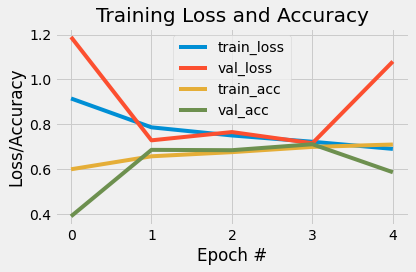

              precision    recall  f1-score   support

   Animation       0.42      0.85      0.56       394
      Horror       0.83      0.57      0.67       786
     Western       0.61      0.06      0.11       174

    accuracy                           0.59      1354
   macro avg       0.62      0.49      0.45      1354
weighted avg       0.68      0.59      0.57      1354



In [250]:
# Plot and save history via the earlier defined function
plot_history(H, 5) #NB: epochs(10) can be set as a paramenter

# Print the classification report
predictions = model.predict(X_test, batch_size=10)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=final_cathegories))

# Experimenting with few images

In [43]:
Animation = f_df.loc[f_df['Genre'] == "Animation"][:300]
Horror = f_df.loc[f_df['Genre'] == "Horror"][:300]

In [259]:
new_df = pd.DataFrame()

for i in range(8):
    genre = f_df["Genre"].unique()[i]
    
    data = f_df.loc[f_df['Genre'] == genre][:300]
    
    new_df = new_df.append(data)

In [260]:
len(new_df)

2400

In [263]:
len(new_df["Genre"])

2400

In [264]:
new_df = new_df.reset_index(drop=True)

In [266]:
final_cathegories = []
for cat in new_df["Genre"].unique():
    
    #We find the Genres, that is only described by cathegory
    # "|" indicate that the movie has more than one genre.
    if "|" not in str(cat):
        final_cathegories.append(cat)

print(final_cathegories)

['Animation', 'Horror', 'Romance', 'Comedy', 'Drama', 'Documentary', 'Western', 'Thriller']


In [267]:
try:
    os.mkdir("data/new_df_posters")
except FileExistsError:
    print("new_df_posters already exists.")

In [268]:
errors = []
for i in range(len(new_df)):
    
    index = str(i)
    #Creating name of poster files
    filename = "data/new_df_posters/"+ str(index.zfill(5)) + "_" + str(new_df["Title"][i]) +  ".jpg"
    print(filename)
    
    #Accessing the links for the posters
    image_url = new_df["Poster"][i]
    #print(image_url)
    
    #Error handling.
    #If the poster does not exist: pass, and move on to the next file.
    try:
        image_filename = wget.download(image_url, filename)
    except:
        print("There was an error")
        errors.append(int(index))
        pass

data/new_df_posters/00000_Toy_Story_(1995).jpg
data/new_df_posters/00001_Balto_(1995).jpg
data/new_df_posters/00002_Pocahontas_(1995).jpg
data/new_df_posters/00003_A_Goofy_Movie_(1995).jpg
data/new_df_posters/00004_Gumby:_The_Movie_(1995).jpg
data/new_df_posters/00005_The_Swan_Princess_(1994).jpg
data/new_df_posters/00006_The_Lion_King_(1994).jpg
data/new_df_posters/00007_The_Secret_Adventures_of_Tom_Thumb_(1993).jpg
data/new_df_posters/00008_The_Nightmare_Before_Christmas_(1993).jpg
data/new_df_posters/00009_The_Pagemaster_(1994).jpg
data/new_df_posters/00010_Aladdin_(1992).jpg
data/new_df_posters/00011_Snow_White_and_the_Seven_Dwarfs_(1937).jpg
data/new_df_posters/00012_Beauty_and_the_Beast_(1991).jpg
data/new_df_posters/00013_Pinocchio_(1940).jpg
data/new_df_posters/00014_Heavy_Metal_(1981).jpg
data/new_df_posters/00015_The_AristoCats_(1970).jpg
data/new_df_posters/00016_All_Dogs_Go_to_Heaven_2_(1996).jpg
data/new_df_posters/00017_James_and_the_Giant_Peach_(1996).jpg
data/new_df_pos

data/new_df_posters/00146_The_Jungle_Book_2_(2003).jpg
data/new_df_posters/00147_Piglet's_Big_Movie_(2003).jpg
data/new_df_posters/00148_Cowboy_Bebop:_The_Movie_(2001).jpg
data/new_df_posters/00149_Castle_in_the_Sky_(1986).jpg
data/new_df_posters/00150_Pokí©mon_Heroes_(2002).jpg
data/new_df_posters/00151_Finding_Nemo_(2003).jpg
data/new_df_posters/00152_Gay_Purr-ee_(1962).jpg
data/new_df_posters/00153_Rugrats_Go_Wild_(2003).jpg
data/new_df_posters/00154_Sinbad:_Legend_of_the_Seven_Seas_(2003).jpg
data/new_df_posters/00155_Millennium_Actress_(2001).jpg
data/new_df_posters/00156_The_Triplets_of_Belleville_(2003).jpg
data/new_df_posters/00157_Ninja_Scroll_(1993).jpg
data/new_df_posters/00158_Brother_Bear_(2003).jpg
data/new_df_posters/00159_Looney_Tunes:_Back_in_Action_(2003).jpg
data/new_df_posters/00160_Marquis_(1989).jpg
data/new_df_posters/00161_Nausicaí__of_the_Valley_of_the_Wind_(1984).jpg
data/new_df_posters/00162_Wings_of_Honneamise_(1987).jpg
data/new_df_posters/00163_Teacher's_P

data/new_df_posters/00288_The_Ugly_Duckling_and_Me!_(2006).jpg
data/new_df_posters/00289_Kamui_no_ken_(1985).jpg
data/new_df_posters/00290_Atlantis:_Milo's_Return_(2003).jpg
data/new_df_posters/00291_TMNT_(2007).jpg
data/new_df_posters/00292_Meet_the_Robinsons_(2007).jpg
data/new_df_posters/00293_How_the_Grinch_Stole_Christmas!_(1966).jpg
data/new_df_posters/00294_Aqua_Teen_Hunger_Force_Colon_Movie_Film_for_Theaters_(2007).jpg
data/new_df_posters/00295_Gedo_senki_(2006).jpg
data/new_df_posters/00296_Paprika_(2006).jpg
data/new_df_posters/00297_The_Adventures_of_Mark_Twain_(1985).jpg
data/new_df_posters/00298_Shrek_the_Third_(2007).jpg
data/new_df_posters/00299_Surf's_Up_(2007).jpg
data/new_df_posters/00300_Dracula:_Dead_and_Loving_It_(1995).jpg
data/new_df_posters/00301_From_Dusk_Till_Dawn_(1996).jpg
data/new_df_posters/00302_Vampire_in_Brooklyn_(1995).jpg
data/new_df_posters/00303_The_Addiction_(1995).jpg
data/new_df_posters/00304_Lord_of_Illusions_(1995).jpg
data/new_df_posters/00305

data/new_df_posters/00435_The_Texas_Chainsaw_Massacre_2_(1986).jpg
data/new_df_posters/00436_Leatherface:_Texas_Chainsaw_Massacre_III_(1990).jpg
data/new_df_posters/00437_Peeping_Tom_(1960).jpg
data/new_df_posters/00438_Pet_Sematary_(1989).jpg
data/new_df_posters/00439_Pet_Sematary_II_(1992).jpg
data/new_df_posters/00440_Children_of_the_Corn_II:_The_Final_Sacrifice_(1992).jpg
data/new_df_posters/00441_Children_of_the_Corn_III:_Urban_Harvest_(1995).jpg
data/new_df_posters/00442_Christine_(1983).jpg
data/new_df_posters/00443_Alligator_(1980).jpg
data/new_df_posters/00444_The_Haunting_(1963).jpg
data/new_df_posters/00445_Dead_Ringers_(1988).jpg
data/new_df_posters/00446_My_Boyfriend's_Back_(1993).jpg
data/new_df_posters/00447_Ravenous_(1999).jpg
data/new_df_posters/00448_Goliathon_(1977).jpg
data/new_df_posters/00449_Idle_Hands_(1999).jpg
data/new_df_posters/00450_The_Mummy_(1932).jpg
data/new_df_posters/00451_The_Mummy_(1959).jpg
data/new_df_posters/00452_The_Mummy's_Curse_(1944).jpg
dat

data/new_df_posters/00587_My_Demon_Lover_(1987).jpg
data/new_df_posters/00588_Valentine_(2001).jpg
data/new_df_posters/00589_The_Abominable_Dr._Phibes_(1971).jpg
data/new_df_posters/00590_Manhunter_(1986).jpg
data/new_df_posters/00591_The_Forsaken_(2001).jpg
data/new_df_posters/00592_Nattevagten_(1994).jpg
data/new_df_posters/00593_Macabre_(1958).jpg
data/new_df_posters/00594_House_of_Usher_(1960).jpg
data/new_df_posters/00595_Faust_(1926).jpg
data/new_df_posters/00596_The_House_by_the_Cemetery_(1981).jpg
data/new_df_posters/00597_Popcorn_(1991).jpg
data/new_df_posters/00598_Bad_Dreams_(1988).jpg
data/new_df_posters/00599_Critters_(1986).jpg
data/new_df_posters/00600_Sense_and_Sensibility_(1995).jpg
data/new_df_posters/00601_Leaving_Las_Vegas_(1995).jpg
data/new_df_posters/00602_When_Night_Is_Falling_(1995).jpg
data/new_df_posters/00603_Once_Upon_a_Time..._When_We_Were_Colored_(1995).jpg
data/new_df_posters/00604_Angels_and_Insects_(1995).jpg
data/new_df_posters/00605_Up_Close_&_Person

data/new_df_posters/00743_The_Virgin_Suicides_(1999).jpg
data/new_df_posters/00744_Timecode_(2000).jpg
data/new_df_posters/00745_Two_Moon_Junction_(1988).jpg
data/new_df_posters/00746_Up_at_the_Villa_(2000).jpg
data/new_df_posters/00747_Those_Who_Love_Me_Can_Take_the_Train_(1998).jpg
data/new_df_posters/00748_Vagabond_(1985).jpg
data/new_df_posters/00749_A_Woman_of_Paris:_A_Drama_of_Fate_(1923).jpg
data/new_df_posters/00750_Autumn_in_New_York_(2000).jpg
data/new_df_posters/00751_...And_God_Created_Woman_(1956).jpg
data/new_df_posters/00752_An_Affair_of_Love_(1999).jpg
data/new_df_posters/00753_Our_Town_(1940).jpg
data/new_df_posters/00754_Bounce_(2000).jpg
data/new_df_posters/00755_Boys_Life_3_(2000).jpg
data/new_df_posters/00756_Chocolat_(2000).jpg
data/new_df_posters/00757_An_Officer_and_a_Gentleman_(1982).jpg
data/new_df_posters/00758_The_Man_in_the_Moon_(1991).jpg
data/new_df_posters/00759_Trolí_sa_(2000).jpg
data/new_df_posters/00760_The_Legend_of_Rita_(2000).jpg
data/new_df_poste

data/new_df_posters/00900_Four_Rooms_(1995).jpg
data/new_df_posters/00901_Bio-Dome_(1996).jpg
data/new_df_posters/00902_French_Twist_(1995).jpg
data/new_df_posters/00903_Black_Sheep_(1996).jpg
data/new_df_posters/00904_A_Midwinter's_Tale_(1995).jpg
data/new_df_posters/00905_Mr._Wrong_(1996).jpg
data/new_df_posters/00906_Happiness_Is_in_the_Field_(1995).jpg
data/new_df_posters/00907_Steal_Big_Steal_Little_(1995).jpg
data/new_df_posters/00908_Flirting_with_Disaster_(1996).jpg
data/new_df_posters/00909_Down_Periscope_(1996).jpg
data/new_df_posters/00910_The_Birdcage_(1996).jpg
data/new_df_posters/00911_Canadian_Bacon_(1995).jpg
data/new_df_posters/00912_Jury_Duty_(1995).jpg
data/new_df_posters/00913_Party_Girl_(1995).jpg
data/new_df_posters/00914_Billy_Madison_(1995).jpg
data/new_df_posters/00915_Clerks_(1994).jpg
data/new_df_posters/00916_Dumb_&_Dumber_(1994).jpg
data/new_df_posters/00917_Houseguest_(1995).jpg
data/new_df_posters/00918_Dazed_and_Confused_(1993).jpg
data/new_df_posters/00

data/new_df_posters/01052_Mr._Accident_(2000).jpg
data/new_df_posters/01053_An_Everlasting_Piece_(2000).jpg
data/new_df_posters/01054_Don't_Tell_Mom_the_Babysitter's_Dead_(1991).jpg
data/new_df_posters/01055_Born_in_East_L.A._(1987).jpg
data/new_df_posters/01056_Critical_Condition_(1987).jpg
data/new_df_posters/01057_Disorderlies_(1987).jpg
data/new_df_posters/01058_Hollywood_Shuffle_(1987).jpg
data/new_df_posters/01059_Hot_Pursuit_(1987).jpg
data/new_df_posters/01060_Morgan_Stewart's_Coming_Home_(1987).jpg
data/new_df_posters/01061_Real_Life_(1979).jpg
data/new_df_posters/01062_Revenge_of_the_Nerds_(1984).jpg
data/new_df_posters/01063_Revenge_of_the_Nerds_II:_Nerds_in_Paradise_(1987).jpg
data/new_df_posters/01064_Tomcats_(2001).jpg
data/new_df_posters/01065_Freddy_Got_Fingered_(2001).jpg
data/new_df_posters/01066_Lost_in_America_(1985).jpg
data/new_df_posters/01067_9_to_5_(1980).jpg
data/new_df_posters/01068_Summer_Rental_(1985).jpg
data/new_df_posters/01069_City_Slickers_(1991).jpg
d

data/new_df_posters/01202_The_Journey_of_August_King_(1995).jpg
data/new_df_posters/01203_City_Hall_(1996).jpg
data/new_df_posters/01204_Margaret's_Museum_(1995).jpg
data/new_df_posters/01205_The_Boys_of_St._Vincent_(1992).jpg
data/new_df_posters/01206_Angela_(1995).jpg
data/new_df_posters/01207_The_Neon_Bible_(1995).jpg
data/new_df_posters/01208_Gospa_(1995).jpg
data/new_df_posters/01209_Belle_de_Jour_(1967).jpg
data/new_df_posters/01210_Kids_(1995).jpg
data/new_df_posters/01211_Safe_(1995).jpg
data/new_df_posters/01212_Showgirls_(1995).jpg
data/new_df_posters/01213_The_Stars_Fell_on_Henrietta_(1995).jpg
data/new_df_posters/01214_The_Browning_Version_(1994).jpg
data/new_df_posters/01215_The_Cure_(1995).jpg
data/new_df_posters/01216_Exotica_(1994).jpg
data/new_df_posters/01217_Ladybird_Ladybird_(1994).jpg
data/new_df_posters/01218_Losing_Isaiah_(1995).jpg
data/new_df_posters/01219_My_Family_(1995).jpg
data/new_df_posters/01220_Nell_(1994).jpg
data/new_df_posters/01221_Panther_(1995).jp

data/new_df_posters/01359_Grandview,_U.S.A._(1984).jpg
data/new_df_posters/01360_Men_Don't_Leave_(1990).jpg
data/new_df_posters/01361_Choices_(1981).jpg
data/new_df_posters/01362_Lilian's_Story_(1996).jpg
data/new_df_posters/01363_If...._(1968).jpg
data/new_df_posters/01364_Shadrach_(1998).jpg
data/new_df_posters/01365_Slam_(1998).jpg
data/new_df_posters/01366_The_Nights_of_Cabiria_(1957).jpg
data/new_df_posters/01367_Central_Station_(1998).jpg
data/new_df_posters/01368_The_Celebration_(1998).jpg
data/new_df_posters/01369_Glen_or_Glenda_(1953).jpg
data/new_df_posters/01370_Mass_Appeal_(1984).jpg
data/new_df_posters/01371_A_Civil_Action_(1998).jpg
data/new_df_posters/01372_Down_in_the_Delta_(1998).jpg
data/new_df_posters/01373_The_Apple_(1998).jpg
data/new_df_posters/01374_Narayama_bushikíÇ_(1983).jpg
data/new_df_posters/01375_The_Deep_End_of_the_Ocean_(1999).jpg
data/new_df_posters/01376_Harvest_(1998).jpg
data/new_df_posters/01377_The_Dreamlife_of_Angels_(1998).jpg
data/new_df_posters

data/new_df_posters/01517_Fast,_Cheap_&_Out_of_Control_(1997).jpg
data/new_df_posters/01518_Wonderland_(1997).jpg
data/new_df_posters/01519_Arguing_the_World_(1998).jpg
data/new_df_posters/01520_A_Paralyzing_Fear:_The_Story_of_Polio_in_America_(1998).jpg
data/new_df_posters/01521_Dear_Jesse_(1998).jpg
data/new_df_posters/01522_Full_Tilt_Boogie_(1997).jpg
data/new_df_posters/01523_Roger_&_Me_(1989).jpg
data/new_df_posters/01524_Die_Salzmí_nner_von_Tibet_(1997).jpg
data/new_df_posters/01525_A_Century_of_Cinema_(1994).jpg
data/new_df_posters/01526_The_Cruise_(1998).jpg
data/new_df_posters/01527_Hands_on_a_Hard_Body:_The_Documentary_(1997).jpg
data/new_df_posters/01528_Dancemaker_(1998).jpg
data/new_df_posters/01529_Fotoamator_(1998).jpg
data/new_df_posters/01530_Get_Bruce_(1999).jpg
data/new_df_posters/01531_Trekkies_(1997).jpg
data/new_df_posters/01532_Return_with_Honor_(1998).jpg
data/new_df_posters/01533_Kestrel's_Eye_(1998).jpg
data/new_df_posters/01534_Gendernauts:_A_Journey_Through_

data/new_df_posters/01656_Street_Fight_(2005).jpg
data/new_df_posters/01657_Fuck_(2005).jpg
data/new_df_posters/01658_We_Feed_the_World_(2005).jpg
data/new_df_posters/01659_When_the_Levees_Broke:_A_Requiem_in_Four_Acts.jpg
data/new_df_posters/01660_Die_groíôe_Stille_(2005).jpg
data/new_df_posters/01661_The_Secret_(2006).jpg
data/new_df_posters/01662_God_Grew_Tired_of_Us_(2006).jpg
data/new_df_posters/01663_Sharkwater_(2006).jpg
data/new_df_posters/01664_Zoo_(2007).jpg
data/new_df_posters/01665_Who_the_#$&%_Is_Jackson_Pollock?_(2006).jpg
data/new_df_posters/01666_Manufactured_Landscapes_(2006).jpg
data/new_df_posters/01667_La_sierra_(2005).jpg
data/new_df_posters/01668_China_Blue_(2005).jpg
data/new_df_posters/01669_TerrorStorm:_A_History_of_Government-Sponsored_Terrorism_(2006).jpg
data/new_df_posters/01670_Chronique_d'un_Ì©tÌ©_(Paris_1960)_(1961).jpg
data/new_df_posters/01671_...And_the_Pursuit_of_Happiness_(1986).jpg
data/new_df_posters/01672_Manufacturing_Dissent_(2007).jpg
data/new

data/new_df_posters/01796_Hoop_Reality_(2007).jpg
data/new_df_posters/01797_A_Tale_of_the_Wind_(1988).jpg
data/new_df_posters/01798_Zorns_Lemma_(1970).jpg
data/new_df_posters/01799_La_rÌ©gion_centrale_(1971).jpg
data/new_df_posters/01800_Wild_Bill_(1995).jpg
data/new_df_posters/01801_Bad_Girls_(1994).jpg
data/new_df_posters/01802_City_Slickers_II:_The_Legend_of_Curly's_Gold_(1994).jpg
data/new_df_posters/01803_Geronimo:_An_American_Legend_(1993).jpg
data/new_df_posters/01804_Lightning_Jack_(1994).jpg
data/new_df_posters/01805_Dances_with_Wolves_(1990).jpg
data/new_df_posters/01806_The_Wild_Bunch_(1969).jpg
data/new_df_posters/01807_Dead_Man_(1995).jpg
data/new_df_posters/01808_Pharaoh's_Army_(1995).jpg
data/new_df_posters/01809_Giant_(1956).jpg
data/new_df_posters/01810_Angel_and_the_Badman_(1947).jpg
data/new_df_posters/01811_The_Apple_Dumpling_Gang_(1975).jpg
data/new_df_posters/01812_Davy_Crockett:_King_of_the_Wild_Frontier_(1955).jpg
data/new_df_posters/01813_The_Good,_the_Bad_and_

data/new_df_posters/01947_The_Shooting_(1966).jpg
data/new_df_posters/01948_The_War_Wagon_(1967).jpg
data/new_df_posters/01949_Death_Rides_a_Horse_(1967).jpg
data/new_df_posters/01950_The_Beguiled_(1971).jpg
data/new_df_posters/01951_Evil_Roy_Slade_(1972).jpg
data/new_df_posters/01952_Lawman_(1971).jpg
data/new_df_posters/01953_They_Call_Me_Trinity_(1970).jpg
data/new_df_posters/01954_Support_Your_Local_Gunfighter_(1971).jpg
data/new_df_posters/01955_El_topo_(1970).jpg
data/new_df_posters/01956_My_Name_Is_Nobody_(1973).jpg
data/new_df_posters/01957_From_Noon_Till_Three_(1976).jpg
data/new_df_posters/01958_The_Missouri_Breaks_(1976).jpg
data/new_df_posters/01959_Lonesome_Dove.jpg
data/new_df_posters/01960_Return_to_Lonesome_Dove.jpg
data/new_df_posters/01961_From_Dusk_Till_Dawn_3:_The_Hangman's_Daughter_(1999).jpg
data/new_df_posters/01962_Purgatory_(1999).jpg
data/new_df_posters/01963_The_Tracker_(2002).jpg
data/new_df_posters/01964_Renegade_(2004).jpg
data/new_df_posters/01965_Arrowhe

data/new_df_posters/02103_Stranger_in_the_House_(1997).jpg
data/new_df_posters/02104_The_Gingerbread_Man_(1998).jpg
data/new_df_posters/02105_Ratchet_(1996).jpg
data/new_df_posters/02106_Frenzy_(1972).jpg
data/new_df_posters/02107_Torn_Curtain_(1966).jpg
data/new_df_posters/02108_See_the_Sea_(1997).jpg
data/new_df_posters/02109_Shadow_of_a_Doubt_(1943).jpg
data/new_df_posters/02110_The_Ipcress_File_(1965).jpg
data/new_df_posters/02111_Pacific_Heights_(1990).jpg
data/new_df_posters/02112_Uninvited_Guest_(1999).jpg
data/new_df_posters/02113_The_Fourth_Protocol_(1987).jpg
data/new_df_posters/02114_1732_Hítten_(1998).jpg
data/new_df_posters/02115_The_House_on_Carroll_Street_(1988).jpg
data/new_df_posters/02116_Play_Misty_for_Me_(1971).jpg
data/new_df_posters/02117_Subway_(1985).jpg
data/new_df_posters/02118_The_First_Deadly_Sin_(1980).jpg
data/new_df_posters/02119_Revolution_#9_(2001).jpg
data/new_df_posters/02120_The_Whistle_Blower_(1986).jpg
data/new_df_posters/02121_This_Man_Must_Die_(

data/new_df_posters/02264_Alpha_Alert_(2013).jpg
data/new_df_posters/02265_Assassin_(2015).jpg
data/new_df_posters/02266_Hard_Shoulder_(2012).jpg
data/new_df_posters/02267_I-ut_saram_(2012).jpg
data/new_df_posters/02268_Rebel_(1970).jpg
data/new_df_posters/02269_App_(2013).jpg
data/new_df_posters/02270_Cut_Bank_(2014).jpg
data/new_df_posters/02271_Hiver_rouge_(2011).jpg
data/new_df_posters/02272_Bleu_catacombes_(2013).jpg
data/new_df_posters/02273_The_Barber_(2014).jpg
data/new_df_posters/02274_Postmortem_(1998).jpg
data/new_df_posters/02275_Le_prÌ©sident_(1961).jpg
data/new_df_posters/02276_Beyond_the_Reach_(2014).jpg
data/new_df_posters/02277_Night_Call_Nurses_(1972).jpg
data/new_df_posters/02278_Crossplot_(1969).jpg
data/new_df_posters/02279_Fatto_di_sangue_fra_due_uomini_per_causa_di_una_vedova._Si_sospettano_moventi_politici_(1978).jpg
data/new_df_posters/02280_The_Daring_Dobermans_(1973).jpg
data/new_df_posters/02281_Paura_nel_buio_(1989).jpg
data/new_df_posters/02282_The_Good_Li

In [269]:
#Removing errors from list errors.
new_df_error_drop = new_df.drop(labels=errors, axis=0)

In [285]:
from pathlib import Path
#Define the image path
image_path = os.path.join("data/new_df_posters")

#Create empty list, where the arrays will be storred
np_images = pd.DataFrame(columns=["Title", "np_array"])

#Convert every image in the image_path to numpy arrays
for image in Path(image_path).glob("*jpg"):
    image_array = cv2.imread(str(image)) 

    
    np_images = np_images.append({'Title' : str(image)[26:len(str(image))-4],
                           'np_array' : image_array}, 
                           ignore_index=True)

In [286]:
#Sorting the images the dataframe with np_arrys by name. Because all names have a 5 digit number similar to the index of - 
#f_df_error_drop dataframe

#Sorting np-dataframe alphabetical
sorted_np_images = np_images.sort_values(by=['Title']).reset_index(drop=True)

In [287]:
#Sorting "original" df alphabetical
new_df_alpha = new_df_error_drop.sort_values(by=['Title']).reset_index(drop=True)

In [288]:
#Merging the 2 dataframes by title
merged_df_300 = pd.merge(new_df_alpha, sorted_np_images, on="Title")

In [289]:
#Dropping duplicates in the merged dataset.
merged_df_300 = merged_df_300.drop_duplicates(subset=['Title']).reset_index(drop=True)

In [290]:
#Taking the arrays from the datafram and putting them into a list again.
#The model does not work, when np_arrays come from a dataframe
np_list = merged_df_300["np_array"].to_list()

In [294]:
X_train, X_test, y_train, y_test = train_test_split(np_list, 
                                                    merged_df_300["Genre"],
                                                    test_size= 0.25,
                                                    random_state = 9)

In [295]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [296]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
      
      
'''
---------------------- Define and train LeNet CNN model:------------------- 
'''   
#Define model as being Sequential and add layers
model = Sequential()
# First set of CONV => RELU => POOL

#EBT: filter is a mesure of how much the image is split up, and how many times the kernal runs through each image.
model.add(Conv2D(32, (3, 3),  #NB: the filter is set to the input 50 and the kernel to 3x3
                padding="same", 
                input_shape=(268, 182, 3))) #The shape of all the posters with height, width and dimensions
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

#Second set of CONV => RELU => POOL
model.add(Conv2D(64, (3, 3), #NB: the filter is set to 100 and the kernel to 3x3
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(12)) #NB: the filter is set to 500
model.add(Activation("relu"))

# Softmax classifier
model.add(Dense(8))  #NB: the filter is set to 8 which is the number of unique labels
model.add(Activation("softmax"))

# Compile model
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Save model summary as model_architecture.png
plot_model(model, to_file = "model_architecture.png", show_shapes=True, show_layer_names=True)

# Train the model
H = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test), 
              batch_size=10,
              epochs=10, #NB: can be set as a paramenter
              verbose=1)

#View the summary
model.summary()

Epoch 1/10
176/176 [==============================] - 264s 1s/step - loss: 2.0958 - accuracy: 0.1279 - val_loss: 2.0794 - val_accuracy: 0.1158
Epoch 2/10
176/176 [==============================] - 269s 2s/step - loss: 2.0802 - accuracy: 0.1343 - val_loss: 2.0797 - val_accuracy: 0.1158
Epoch 3/10
176/176 [==============================] - 295s 2s/step - loss: 2.0798 - accuracy: 0.1111 - val_loss: 2.0800 - val_accuracy: 0.1158
Epoch 4/10
176/176 [==============================] - 292s 2s/step - loss: 2.0790 - accuracy: 0.1252 - val_loss: 2.0790 - val_accuracy: 0.1158
Epoch 5/10
176/176 [==============================] - 256s 1s/step - loss: 2.0818 - accuracy: 0.1276 - val_loss: 2.0769 - val_accuracy: 0.1124
Epoch 6/10
176/176 [==============================] - 236s 1s/step - loss: 2.0727 - accuracy: 0.1418 - val_loss: 2.0501 - val_accuracy: 0.1567
Epoch 7/10
176/176 [==============================] - 242s 1s/step - loss: 2.0520 - accuracy: 0.1790 - val_loss: 2.0535 - val_accuracy: 0.1670

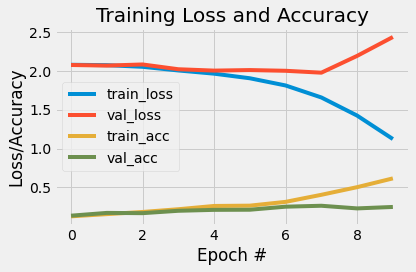

              precision    recall  f1-score   support

   Animation       0.39      0.33      0.36        70
      Horror       0.18      0.31      0.23        68
     Romance       0.25      0.07      0.11        56
      Comedy       0.19      0.40      0.26        88
       Drama       0.28      0.47      0.35        75
 Documentary       0.33      0.02      0.04        83
     Western       0.32      0.10      0.16        78
    Thriller       0.32      0.26      0.29        69

    accuracy                           0.25       587
   macro avg       0.28      0.25      0.22       587
weighted avg       0.28      0.25      0.22       587



In [309]:
# Plot and save history via the earlier defined function
plot_history(H, 10) #NB: epochs(10) can be set as a paramenter

# Print the classification report
predictions = model.predict(X_test, batch_size=10)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=final_cathegories))